In [154]:
#Libraries required for today
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import toeplitz
from scipy.linalg import hankel
from scipy.linalg import solve

In [155]:
#Filter Length 
N = 31
M = ((N - 1)/2)

#Band pass and Band Stop Frequency
wp = np.pi * 0.26
ws = np.pi * 0.34
K = 0.1

#Normalise band edges for convinience
fp = wp / np.pi
fs = ws / np.pi

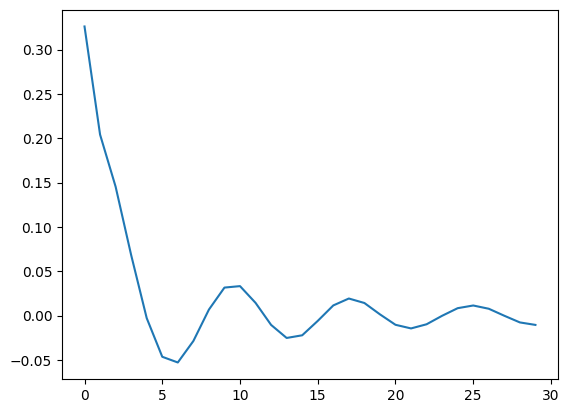

In [156]:
#Construction of q(k)
k = np.arange(1, 2 *M)
Q = np.concatenate((np.array([fp + K * (1 - fs)]), fp * np.sinc(fp * k) - K * fs * np.sinc(fs*k)))
plt.plot(Q)

In [157]:
Q1 = toeplitz(Q[0:15])
Q2 = hankel(Q[0:15],Q[15:30])
q = (Q1 + Q2)/2

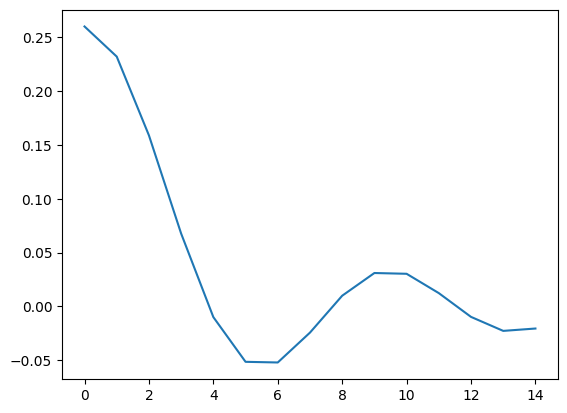

In [158]:
b = [wp/ np.pi* np.sinc(wp * (k) / np.pi) for k in np.arange(0,M)]
plt.plot(b)

In [159]:
a = solve(q,b)

<StemContainer object of 3 artists>

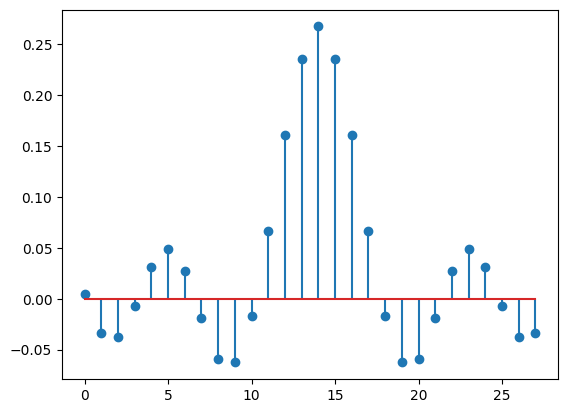

In [160]:
e = np.arange(15-1,0,-1)
h = np.hstack(((a[e], 2 * a[0], a[1:15-1])))/2
plt.stem(h)

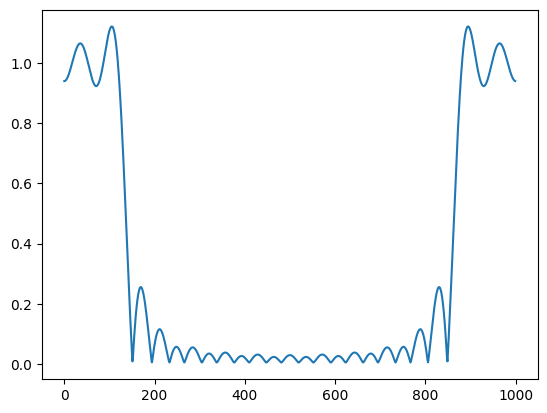

In [161]:
H = np.fft.fft(h,1000)
plt.plot(abs(H))